<a href="https://colab.research.google.com/github/K1RUN/PyTorchMotorTemperatureRegression/blob/main/PyTorchMotorTemperatureRegressionExtended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d wkirgsn/electric-motor-temperature

Dataset URL: https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature
License(s): CC-BY-SA-4.0
 97% 113M/117M [00:03<00:00, 43.1MB/s]
100% 117M/117M [00:03<00:00, 35.6MB/s]


In [6]:
! unzip electric-motor-temperature.zip

Archive:  electric-motor-temperature.zip
  inflating: measures_v2.csv         


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('measures_v2.csv')
df.drop('profile_id', axis=1, inplace=True)

In [9]:
df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60


In [10]:
X = df.drop('torque', axis=1)
y = df['torque']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = pd.DataFrame(scale.fit_transform(X_train), columns=X.columns)

In [13]:
X_test = pd.DataFrame(scale.transform(X_test), columns=X.columns)

In [14]:
y_train = pd.DataFrame(scale.fit_transform(y_train.values.reshape(-1, 1)),
                       columns=['torque'])

In [15]:
y_test = pd.DataFrame(scale.transform(y_test.values.reshape(-1, 1)),
                      columns=['torque'])

In [16]:
X_test

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient
0,0.728613,1.322868,1.341300,-1.158856,1.527861,1.503556,-0.983579,0.181307,1.681132,1.533726,0.595682
1,-0.881172,0.208160,1.649903,-1.662308,1.298450,1.503560,-2.113116,0.420615,1.208469,0.823787,-0.891226
2,0.333085,-0.135595,-0.332635,2.152873,-0.257302,1.275997,-1.216125,-1.301515,0.490303,-0.169963,-0.456066
3,-0.675149,1.355993,1.281090,0.196480,1.489310,-0.915181,0.820242,0.362024,0.270683,1.604925,-0.127936
4,-0.532747,-0.803921,1.206486,-1.620189,0.740182,1.234743,-1.894127,0.502527,0.771614,0.152976,-2.403092
...,...,...,...,...,...,...,...,...,...,...,...
439165,0.260407,1.657779,0.771297,2.158585,1.026228,0.608643,-0.787462,-1.605679,1.004104,1.197501,0.829637
439166,0.712417,2.515797,1.564045,-1.178392,2.033290,0.080485,0.213643,1.014892,1.658552,2.443668,1.808178
439167,1.664373,0.912855,0.029422,0.673107,0.373573,0.331784,0.990737,-0.577923,0.221033,0.653908,2.288847
439168,0.371333,-0.820796,-0.120759,-1.358180,-0.329139,0.428289,-0.851143,0.823029,-0.669901,-0.551694,-1.528107


In [17]:
y_test

,torque
0,0.212570
1,0.568888
2,-1.402356
3,0.244801
4,0.634175
...,...
439165,-1.674711
439166,0.917986
439167,-0.560378
439168,0.894761


<Axes: >

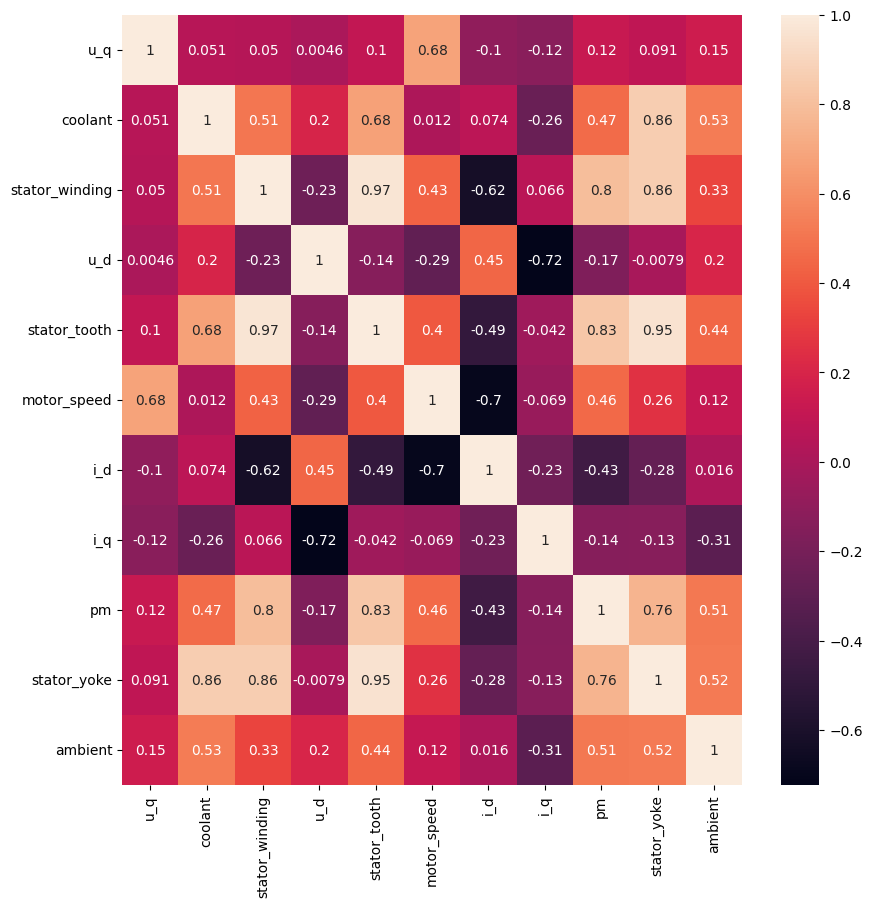

In [18]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(X_train.corr(), annot=True, ax=ax)

In [19]:
target_correlation = X_train.corrwith(y_train['torque'])

Text(0.5, 1.0, 'Correlation with target variable torque')

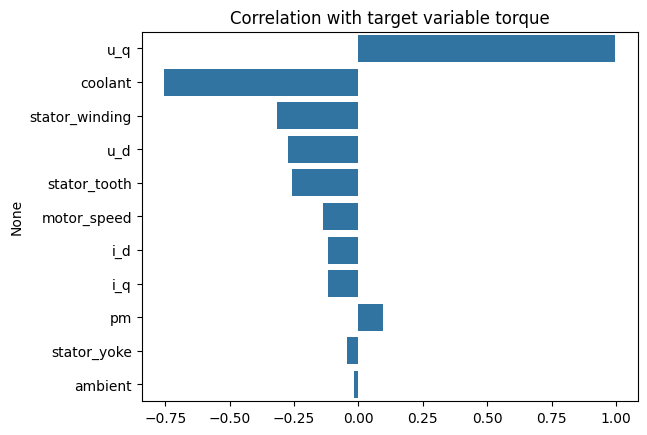

In [20]:
sns.barplot(x=sorted(target_correlation.values, key=abs,
                  reverse=True), y=target_correlation.index, orient='h')
plt.title("Correlation with target variable torque")

In [21]:
sorted(target_correlation.values, key=abs, reverse=True)

[0.9964560815600331,
 -0.7537196145275824,
 -0.3166146938795659,
 -0.2741003352727426,
 -0.2579124496383072,
 -0.1363794189847251,
 -0.11782436226168769,
 -0.11701649628209368,
 0.09578235821593656,
 -0.04416496386829849,
 -0.018275732271170814]

In [22]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02


### NN Architecture

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torchvision.transforms as T

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [24]:
class MotorDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = torch.tensor(data.values)
        self.targets = torch.tensor(targets.values)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.targets[idx]
        return x, y

In [25]:
train_dataset = MotorDataset(X_train, y_train)
test_dataset = MotorDataset(X_test, y_test)

In [26]:
train_dataset[0]

(tensor([-0.3402,  0.6195,  1.3413, -0.5223,  1.3626, -0.6254, -0.0209,  1.5386,
          0.9262,  1.1975,  0.6036], dtype=torch.float64),
 tensor([1.4201], dtype=torch.float64))

In [27]:
batch_size = 16

In [28]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [29]:
class NNRegression(nn.Module):
    def __init__(self):
        super(NNRegression, self).__init__()
        self.fc1 = nn.Linear(11, 11)
        self.fc2 = nn.Linear(11, 12)
        self.fc3 = nn.Linear(12, 5)
        self.fc4 = nn.Linear(5, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = x.float()
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

In [30]:
! pip install torchinfo

In [31]:
from torchinfo import summary

model = NNRegression().to(device)
summary(model, input_size=(batch_size, 11))

Layer (type:depth-idx)                   Output Shape              Param #
NNRegression                             [16, 1]                   --
├─Linear: 1-1                            [16, 11]                  132
├─ReLU: 1-2                              [16, 11]                  --
├─Linear: 1-3                            [16, 12]                  144
├─ReLU: 1-4                              [16, 12]                  --
├─Linear: 1-5                            [16, 5]                   65
├─ReLU: 1-6                              [16, 5]                   --
├─Linear: 1-7                            [16, 1]                   6
Total params: 347
Trainable params: 347
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

### Training


In [32]:
from tqdm import tqdm

In [33]:
train_losses = []

def train(model: NNRegression, epoch: int):
    print(f'Epoch - {epoch}')

    model.train()
    running_loss = 0
    for data in tqdm(train_loader):
        inputs, targets = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.float(), targets.float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f'Train loss - {train_loss}')

In [34]:
val_losses = []

def val(model: NNRegression, epoch: int):
    print(f'Epoch - {epoch}')

    model.eval()
    running_loss = 0
    with torch.no_grad():
        for data in tqdm(test_loader):
            inputs, targets = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_loss += loss.item()

        val_loss = running_loss / len(test_loader)
        val_losses.append(val_loss)
        print(f'Val loss - {val_loss}')

In [35]:
criterion = nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [36]:
max_epochs = 20
for epoch in range(1, max_epochs + 1):
    train(model, epoch)
    val(model, epoch)

Epoch - 1


100%|██████████| 55728/55728 [02:17<00:00, 406.38it/s]


Train loss - 0.0034486148320581294
Epoch - 1


100%|██████████| 27449/27449 [00:18<00:00, 1518.67it/s]


Val loss - 0.00031170555749154133
Epoch - 2


100%|██████████| 55728/55728 [02:07<00:00, 437.05it/s]


Train loss - 0.0003119918704253574
Epoch - 2


100%|██████████| 27449/27449 [00:18<00:00, 1521.82it/s]


Val loss - 0.0002625554062183777
Epoch - 3


100%|██████████| 55728/55728 [02:02<00:00, 453.39it/s]


Train loss - 0.00028625452254889955
Epoch - 3


100%|██████████| 27449/27449 [00:18<00:00, 1457.46it/s]


Val loss - 0.00024953880891518423
Epoch - 4


100%|██████████| 55728/55728 [02:05<00:00, 442.32it/s]


Train loss - 0.0002749453789262082
Epoch - 4


100%|██████████| 27449/27449 [00:19<00:00, 1427.94it/s]


Val loss - 0.000240220601013881
Epoch - 5


100%|██████████| 55728/55728 [02:03<00:00, 451.61it/s]


Train loss - 0.0002651031789594356
Epoch - 5


100%|██████████| 27449/27449 [00:19<00:00, 1399.34it/s]


Val loss - 0.00026429022917326986
Epoch - 6


100%|██████████| 55728/55728 [02:00<00:00, 461.22it/s]


Train loss - 0.00025656612798129604
Epoch - 6


100%|██████████| 27449/27449 [00:18<00:00, 1447.76it/s]


Val loss - 0.00023650534542902986
Epoch - 7


100%|██████████| 55728/55728 [02:01<00:00, 460.19it/s]


Train loss - 0.0002525710677735455
Epoch - 7


100%|██████████| 27449/27449 [00:18<00:00, 1516.69it/s]


Val loss - 0.00024188762622798175
Epoch - 8


100%|██████████| 55728/55728 [01:59<00:00, 465.04it/s]


Train loss - 0.00023734125863362866
Epoch - 8


100%|██████████| 27449/27449 [00:19<00:00, 1428.40it/s]


Val loss - 0.00018999581056149698
Epoch - 9


100%|██████████| 55728/55728 [01:59<00:00, 465.70it/s]


Train loss - 0.000216465531069547
Epoch - 9


100%|██████████| 27449/27449 [00:18<00:00, 1495.54it/s]


Val loss - 0.00019618600411707357
Epoch - 10


100%|██████████| 55728/55728 [02:00<00:00, 463.80it/s]


Train loss - 0.00021413589444591234
Epoch - 10


100%|██████████| 27449/27449 [00:18<00:00, 1511.45it/s]


Val loss - 0.00022225914371805865
Epoch - 11


100%|██████████| 55728/55728 [01:58<00:00, 470.99it/s]


Train loss - 0.0002026487342510379
Epoch - 11


100%|██████████| 27449/27449 [00:19<00:00, 1396.12it/s]


Val loss - 0.00016031441322469762
Epoch - 12


100%|██████████| 55728/55728 [01:58<00:00, 470.50it/s]


Train loss - 0.00021915624370277798
Epoch - 12


100%|██████████| 27449/27449 [00:17<00:00, 1537.85it/s]


Val loss - 0.00019566963657476524
Epoch - 13


100%|██████████| 55728/55728 [01:59<00:00, 465.88it/s]


Train loss - 0.0002034570151611508
Epoch - 13


100%|██████████| 27449/27449 [00:18<00:00, 1503.64it/s]


Val loss - 0.00020812959777003357
Epoch - 14


100%|██████████| 55728/55728 [01:58<00:00, 468.40it/s]


Train loss - 0.00018702223238214837
Epoch - 14


100%|██████████| 27449/27449 [00:18<00:00, 1448.02it/s]


Val loss - 0.00040687397149293377
Epoch - 15


100%|██████████| 55728/55728 [01:58<00:00, 470.89it/s]


Train loss - 0.00018790831606463654
Epoch - 15


100%|██████████| 27449/27449 [00:18<00:00, 1473.48it/s]


Val loss - 0.00014868029854236397
Epoch - 16


100%|██████████| 55728/55728 [01:58<00:00, 469.53it/s]


Train loss - 0.00017401488180282792
Epoch - 16


100%|██████████| 27449/27449 [00:17<00:00, 1536.29it/s]


Val loss - 0.000242404657632191
Epoch - 17


100%|██████████| 55728/55728 [01:58<00:00, 469.24it/s]


Train loss - 0.00017242196153420322
Epoch - 17


100%|██████████| 27449/27449 [00:18<00:00, 1473.14it/s]


Val loss - 0.000141520876270962
Epoch - 18


100%|██████████| 55728/55728 [01:57<00:00, 472.81it/s]


Train loss - 0.00015867900100289073
Epoch - 18


100%|██████████| 27449/27449 [00:18<00:00, 1480.22it/s]


Val loss - 0.00021597747905627017
Epoch - 19


100%|██████████| 55728/55728 [01:58<00:00, 470.04it/s]


Train loss - 0.0001871202584092813
Epoch - 19


100%|██████████| 27449/27449 [00:17<00:00, 1532.87it/s]


Val loss - 0.00012410544122863518
Epoch - 20


100%|██████████| 55728/55728 [01:58<00:00, 470.63it/s]


Train loss - 0.00017836886276082164
Epoch - 20


100%|██████████| 27449/27449 [00:18<00:00, 1459.64it/s]

Val loss - 0.00014379022629873152


## Results

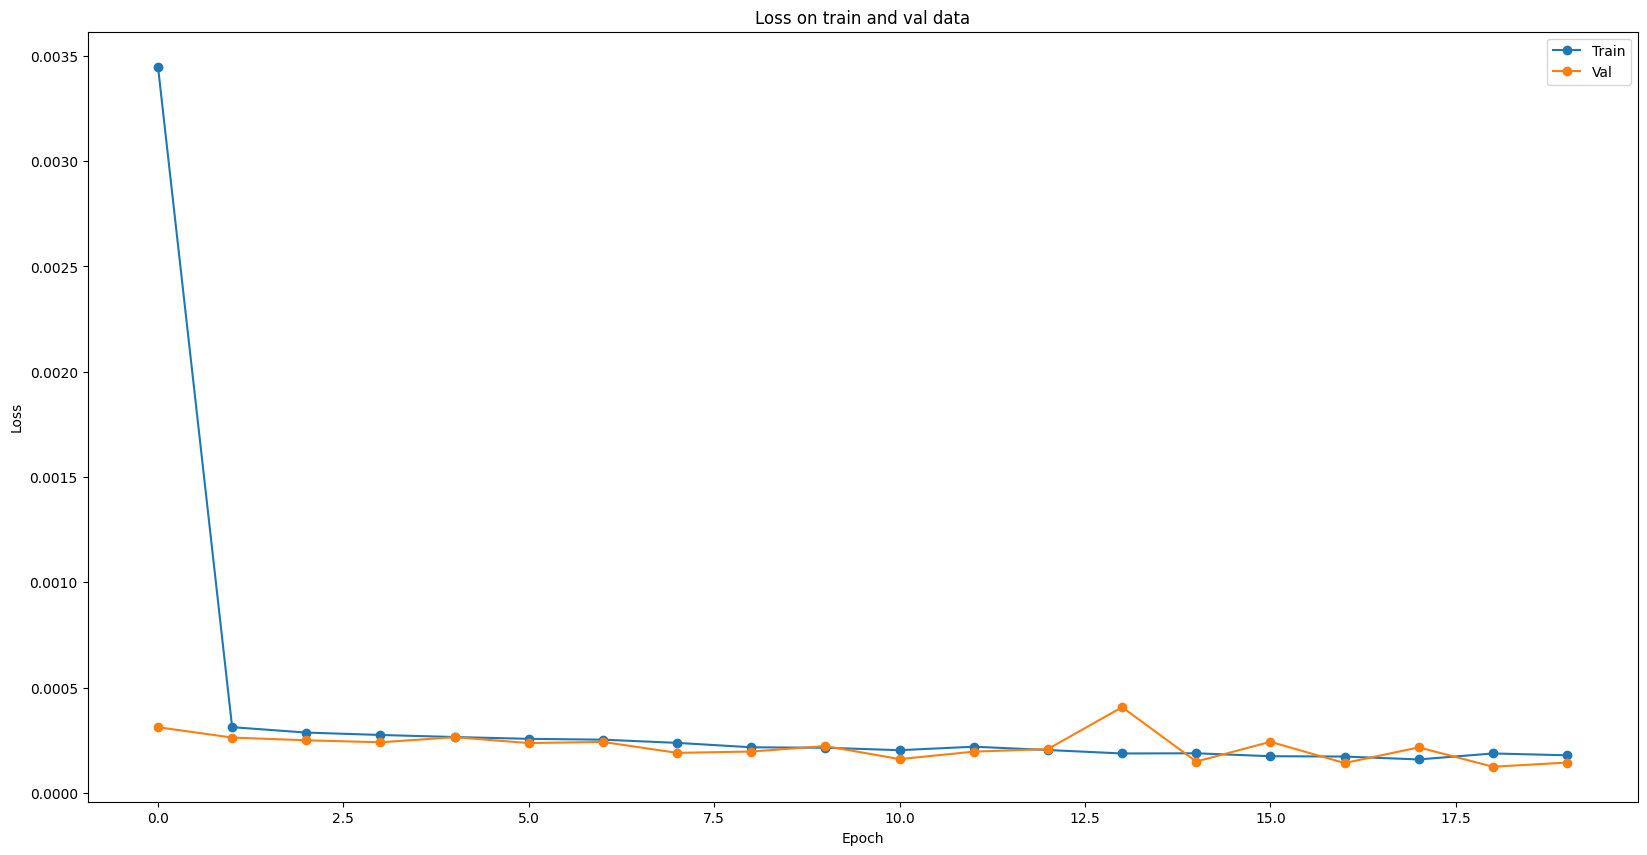

In [37]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.plot(train_losses, '-o')
plt.plot(val_losses, '-o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.title('Loss on train and val data')
plt.show()

In [38]:
model.eval()
y_pred = model(torch.Tensor(X_test.values).to(device))

In [39]:
criterion(y_pred, torch.Tensor(y_test.values).to(device)).item()

0.00014379314961843193

In [40]:
criterion(model(torch.Tensor(X_train.values).to(device)), torch.Tensor(y_train.values).to(device))

tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward0>)

In [41]:
from sklearn.metrics import r2_score

print(r2_score(y_test.values.reshape(-1, 1),
               y_pred.squeeze(dim=1).cpu().detach().numpy()))

0.9998561607071867


Loss on test data = 0.0002451192121952772

$R^2$ score on test data = 0.9997548021552319

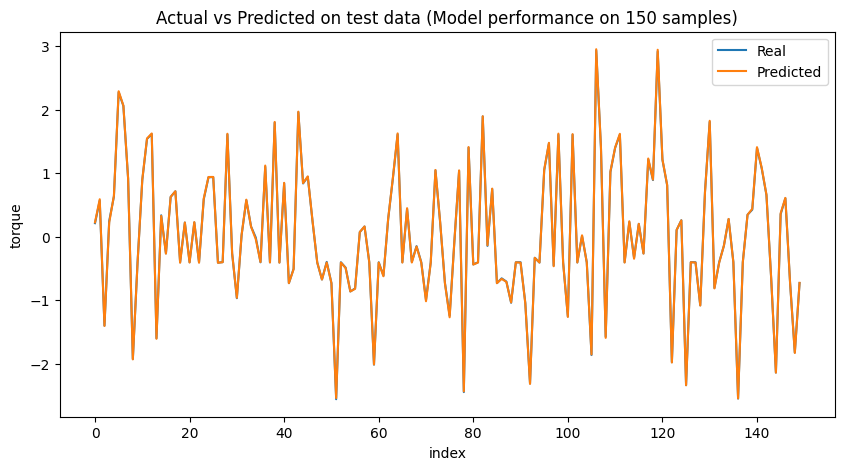

In [42]:
n_sample = 150
test_sample = y_test.values.reshape(-1, 1)[:n_sample]
predicted_sample = y_pred.squeeze(dim=1).cpu().detach().numpy()[:n_sample]


plt.figure(figsize=(10, 5))
plt.plot(range(len(test_sample)), test_sample, label='Real')
plt.plot(range(len(predicted_sample)), predicted_sample, label='Predicted')
plt.xlabel('index')
plt.ylabel('torque')
plt.legend()
plt.title("Actual vs Predicted on test data "
            f"(Model performance on {n_sample} samples)")
plt.show()

In [43]:
for param in model.parameters():
    print(param.data)

tensor([[ 9.8898e-01, -1.1762e-02, -4.7085e-02,  4.9736e-01,  5.5699e-02,
         -4.7804e-01, -8.5255e-01, -1.4029e+00,  3.5765e-02,  5.3947e-02,
         -3.4543e-04],
        [ 3.4092e-01,  3.0897e-02, -2.6934e-02, -5.9311e-01, -7.4583e-02,
          9.7737e-01, -9.9161e-01,  1.2203e+00, -1.7843e-02,  3.1454e-01,
         -5.4055e-02],
        [ 1.0804e-01, -2.6404e+00,  4.2195e-01, -6.7685e-02, -5.3210e-01,
         -6.7844e-01, -4.5292e-01, -4.3053e-01, -4.1223e-02,  4.1306e-03,
         -7.3109e-02],
        [-3.3405e-01, -6.3010e-02, -9.8368e-02,  5.0484e-01, -1.0360e-01,
         -2.4718e-01, -1.1964e-01,  1.1366e+00, -6.7754e-02,  2.6167e-01,
         -8.5578e-02],
        [-3.9915e-01, -7.3930e-02, -5.8435e-02, -4.0743e-01,  4.1465e-02,
         -4.9581e-01, -9.3523e-03,  1.6525e+00, -1.0596e-01,  7.1794e-03,
          1.5939e-02],
        [ 6.0140e-01, -2.6856e-03,  2.9874e-02,  5.6728e-01, -3.0784e-02,
         -1.3719e+00, -1.1637e+00,  1.5636e+00,  2.3540e-02, -3.7861e-0